In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Bitcoin/BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Data Pre-processing**

In [ ]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [ ]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

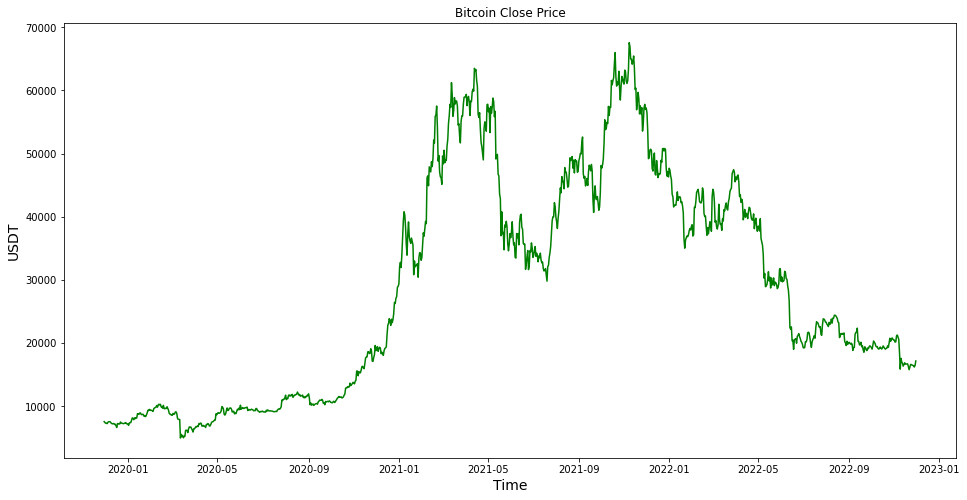

In [ ]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="green")
plt.title('Bitcoin Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [ ]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
846,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
847,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
848,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
849,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703


In [ ]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
853,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
854,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
855,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
856,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Feature Engineering**

In [ ]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,7764.057129,7836.102051,7515.849609,7569.629883,17158194786
1,7571.616211,7571.616211,7291.341797,7424.292480,18720708479
2,7424.036133,7474.818848,7233.399414,7321.988281,17082040706
3,7323.975586,7418.858887,7229.356934,7320.145508,14797485769
4,7320.125000,7539.784668,7170.922852,7252.034668,21664240918


In [ ]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [ ]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (564, 30, 1)
X_test:  (225, 30, 1)


# Model Building

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(None,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
18/18 [==============================] - 16s 345ms/step - loss: 0.0231 - val_loss: 0.0039
Epoch 2/50
18/18 [==============================] - 3s 151ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 3/50
18/18 [==============================] - 3s 159ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 4/50
18/18 [==============================] - 3s 170ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 5/50
18/18 [==============================] - 3s 141ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 6/50
18/18 [==============================] - 3s 154ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 7/50
18/18 [==============================] - 3s 165ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 8/50
18/18 [==============================] - 2s 138ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 9/50
18/18 [==============================] - 3s 160ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 10/50
18/18 [==============================] - 2s 112ms/step - loss: 0.0015 - val_loss: 0.002

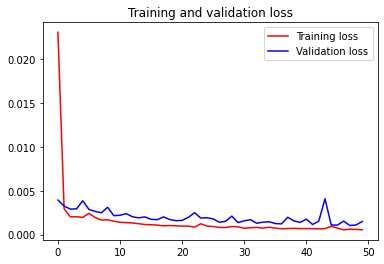

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

# **Performance Evaluation**

In [ ]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

8/8 [==============================] - 0s 21ms/step
train_predict:  (564, 1)
test_predict:  (225, 1)


In [ ]:
# Transform back to original form

# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)
# original_ytrain = scaler.inverse_transform(y_train) 
# original_ytest = scaler.inverse_transform(y_test)

In [ ]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.025828893109669446
Train data MSE:  0.0006671317192707297
Train data MAE:  0.016993838914135934
Train data R2 score: 0.9915346636680549


In [ ]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.03862365708559258
Test data MSE:  0.0014917868866654459
Test data MAE:  0.031217113538688775
Test data R2 score: 0.9101392437415046


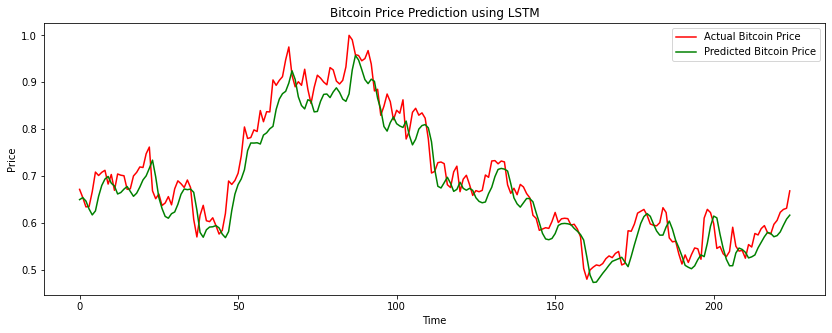

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()